---
---
# Previsão de Customer Churn em Operadoras de Telecom 
---
---

##  Limpeza de Dados // _Data Cleaning_

In [1]:
# Versão da Linguagem Python // Python language version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Installs pyarrow
#!pip install pyarrow

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pyarrow
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Versões dos pacotes usados neste jupyter notebook // Versions of packages used in this jupyter notebook
#!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Tatiana Novaes Carvalho" --iversions

Author: Tatiana Novaes Carvalho

matplotlib: 3.5.1
pyarrow   : 9.0.0
numpy     : 1.22.3
seaborn   : 0.11.2
scipy     : 1.7.3
pandas    : 1.4.2



In [5]:
# Parâmetros de configuração dos gráficos // Graph configuration parameters
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_style('darkgrid')

### Carga dos dados // _Data load_

In [6]:
# Carrega os dados // Load the data
arquivo = 'projeto4_telecom_treino'
df = pd.read_csv(f'../datasets/{arquivo}.csv', index_col = 0)

In [7]:
df.shape

(3333, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [9]:
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [10]:
df.tail(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3333,TN,74,area_code_415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


### Separação das Variáveis Categóricas e Numéricas // _Separation of Categorical and Numerical Variables_

In [11]:
df.columns 

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [12]:
# Lista de colunas categóricas // List of categorical columns
cat_features = ['state',
                'area_code', 
                'international_plan', 
                'voice_mail_plan',
                ]

# Lista de colunas numéricas // List of numerical columns     
num_features = ['account_length', 'number_vmail_messages',
                'total_day_minutes', 'total_day_calls', 'total_day_charge',
                'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                'total_night_minutes', 'total_night_calls', 'total_night_charge',
                'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                'number_customer_service_calls',
                ]

# Variável-alvo // Target
target = ['churn']

In [13]:
df[cat_features].describe()

,state,area_code,international_plan,voice_mail_plan
count,3333,3333,3333,3333
unique,51,3,2,2
top,WV,area_code_415,no,no
freq,106,1655,3010,2411


In [14]:
df[num_features].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Limpeza de dados // _Data cleaning_

> Tratamento de Valores Duplicados // _Treatment of Duplicated Data_

In [15]:
# Checando existência de valores duplicados // Checking for duplicate values
df.duplicated().sum()

0

Não há registros duplicados no dataset em análise.

> Tratamento de Valores Extremos // Outliers

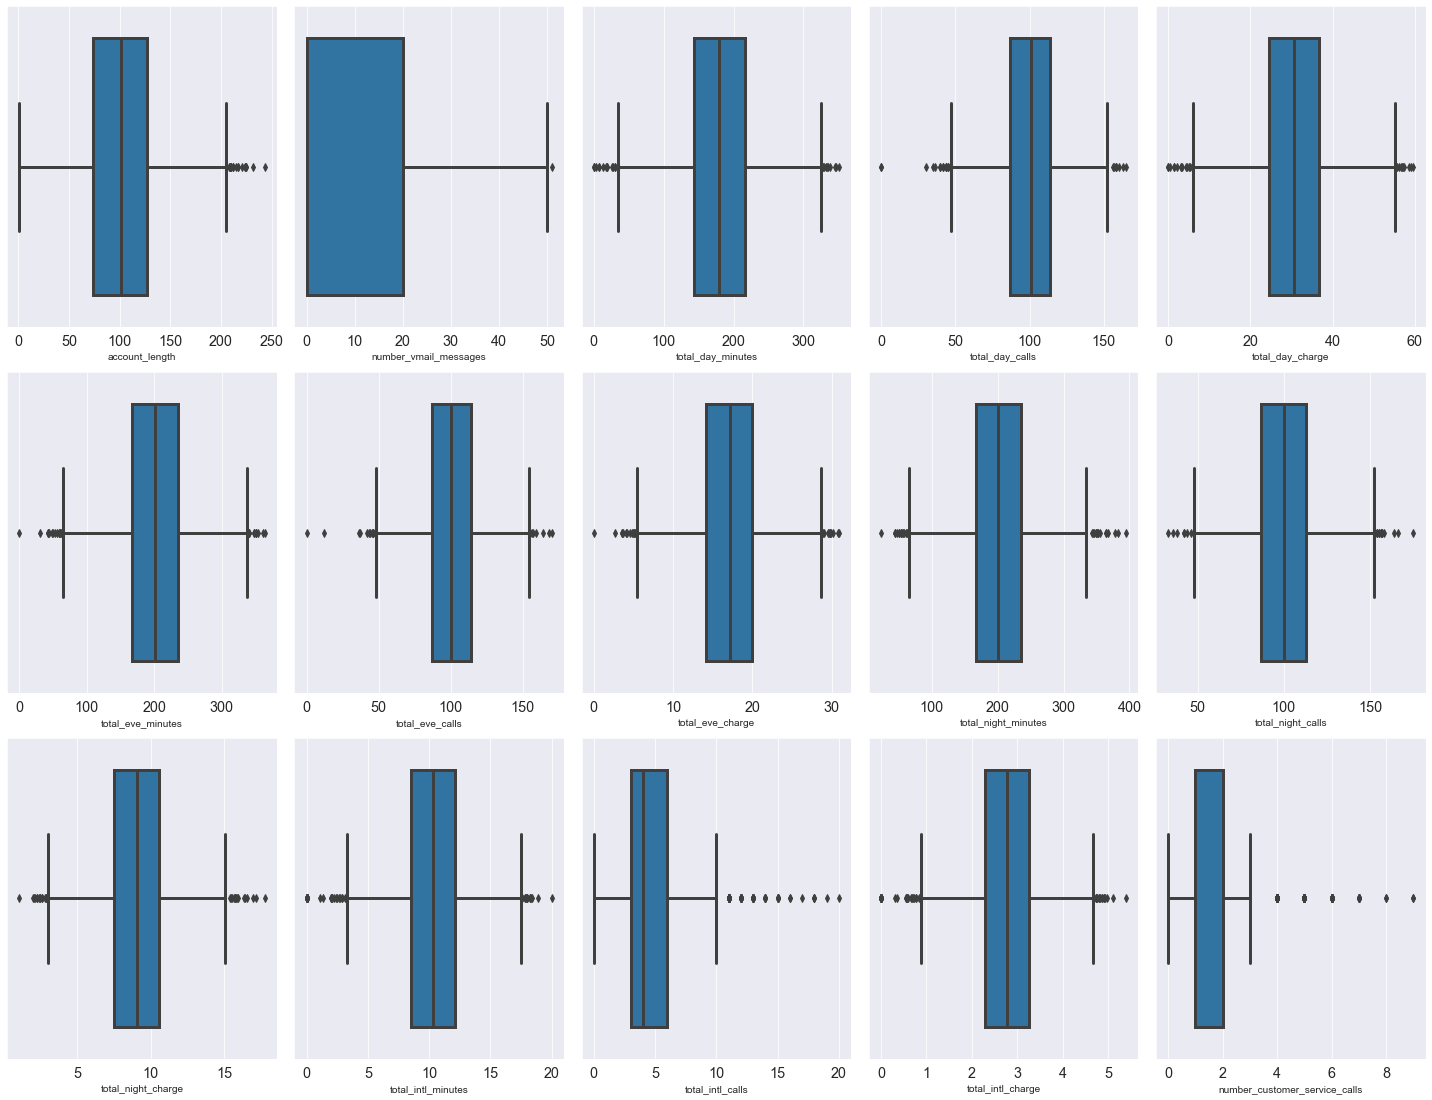

In [16]:
# Boxplots das variáveis numéricas // Boxplots of numeric variables

# Função para geração de boxplots
def plot_boxplot(df, features_list:list, qtd_subplots:int=3, orient:str='h'):
    """
    Função para análise univariada das variáveis numéricas utilizando gráficos boxplots da biblioteca Seaborn.
    Function for univariate analysis of numerical variables using boxplot plots from the Seaborn library.
    """
    plt.figure(figsize = (20, 20))
    for i in range(0, len(features_list)):
        plt.subplot(qtd_subplots, int(len(features_list)/3), i + 1)
        chart = sns.boxplot(x = df[features_list[i]], orient = orient)
        plt.tight_layout()
    
    return chart

# Chamada à função
plot_boxplot(df=df, features_list=num_features,qtd_subplots=4);

In [17]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {df.shape[0]}')

Número de linhas antes de filtrar valores extremos (outliers): 3333


In [18]:
# Calculando limites superior e inferior para detecção dos outliers // Calculating upper and lower limits for outlier detection

# Valores extremos estão abaixo do limite inferior ou acima do limite superior
for col in num_features:
    sup_limit = df[col].mean() + 3 * df[col].std()
    inf_limit = df[col].mean() - 3 * df[col].std()

    # Apurando número de registros com outliers para cada coluna
    print(f'Número de outliers em {col}: {df[(df[col] <= inf_limit) | (df[col] >= sup_limit)].shape[0]}')

# Fitrando df
df = df[(df[col] > inf_limit) | (df[col] < sup_limit)]

Número de outliers em account_length: 7
Número de outliers em number_vmail_messages: 3
Número de outliers em total_day_minutes: 9
Número de outliers em total_day_calls: 9
Número de outliers em total_day_charge: 9
Número de outliers em total_eve_minutes: 9
Número de outliers em total_eve_calls: 7
Número de outliers em total_eve_charge: 9
Número de outliers em total_night_minutes: 11
Número de outliers em total_night_calls: 6
Número de outliers em total_night_charge: 11
Número de outliers em total_intl_minutes: 22
Número de outliers em total_intl_calls: 50
Número de outliers em total_intl_charge: 22
Número de outliers em number_customer_service_calls: 35


In [19]:
df[num_features].head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
4,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
5,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [20]:
# Remoção de outliers // Outlier removal

# Função para remoção de outliers
def filtra_outlier(df, num_features):
    registros = np.array([True] * len(df))
    
    for col in num_features:
        # Calcula o z-score absoluto
        zscore = abs(stats.zscore(df[col]))

        # Mantém valores com menos de 3 z-score absoluto
        registros = (zscore < 3) & registros
        
    # Remove registros com o z-score abaixo de 3 nas colunas numéricas e retorna df filtrado
    df = df[registros]
    return df

# Chamada à função
df = filtra_outlier(df, num_features)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [21]:
print(f'Número de linhas após filtrar valores extremos (outliers): {df.shape[0]}')

Número de linhas após filtrar valores extremos (outliers): 3169


> Tratamento de Valores Ausentes // _Treatment of Missing Data_

In [22]:
# Checando valores ausentes // Checking missing values
print(df.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


**Observações:**
1. Não há dados ausentes no dataset em análise.
2. Não há informações ausentes no dataset em análise (ausência de caracteres especiais, tais como ponto de interrogação, hífen etc.)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3169 non-null   object 
 1   account_length                 3169 non-null   int64  
 2   area_code                      3169 non-null   object 
 3   international_plan             3169 non-null   object 
 4   voice_mail_plan                3169 non-null   object 
 5   number_vmail_messages          3169 non-null   int64  
 6   total_day_minutes              3169 non-null   float64
 7   total_day_calls                3169 non-null   int64  
 8   total_day_charge               3169 non-null   float64
 9   total_eve_minutes              3169 non-null   float64
 10  total_eve_calls                3169 non-null   int64  
 11  total_eve_charge               3169 non-null   float64
 12  total_night_minutes            3169 non-null   f

In [24]:
# Gravação dos dados transformados em disco // Writing the transformed data to disk
df.to_parquet('../datasets/df_cleaned.dat')